## Create a tensor

In [4]:
import numpy as np

np.set_printoptions(suppress=True)

#Generate random distrbuted parameters
params=np.random.uniform(low=-50,high=150,size=20)
#print(params)

params[0]=params.max()+1
params[1]=params.min()-1
params[2]=0


params=np.round(params,2)
print(params)

[149.84 -43.73   0.    47.85  -7.   -10.05  11.1   17.51  -4.52  55.96
 -42.73 117.07  66.8   48.47 148.84 109.39  32.28  10.52 148.63   2.14]


# Asymmetric Quantization
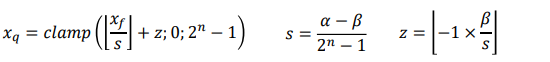

In [5]:
def clamp(params_q:np.array,lower_bound:int,upper_bound:int):
    params_q[params_q<lower_bound]=lower_bound
    params_q[params_q>upper_bound]=upper_bound
    return params_q


def asymmetric_quantization(params:np.array,bits:int):
  alpha=np.max(params)
  beta=np.min(params)
  scale=(alpha-beta)/(2**bits-1)
  z=-1*np.round(beta/scale)
  lower_bound,upper_bound=0,2**bits-1
  quantized=clamp(np.round(params/scale)+z,lower_bound,upper_bound)
  return quantized,scale,z

(asymmetric_q, asymmetric_scale, asymmetric_z) = asymmetric_quantization(params, 8)
print(f'Asymmetric scale: {asymmetric_scale}, zero: {asymmetric_z}')
print(asymmetric_q)


Asymmetric scale: 0.7590980392156862, zero: 58.0
[255.   0.  58. 121.  49.  45.  73.  81.  52. 132.   2. 212. 146. 122.
 254. 202. 101.  72. 254.  61.]


## Asymmetric Dequantization
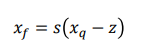

In [7]:
def asymmetric_dequantize(params_q: np.array, scale: float, z: int):
    return (params_q - z) * scale

# Dequantize the parameters back to 32 bits
params_deq_asymmetric = asymmetric_dequantize(asymmetric_q, asymmetric_scale, asymmetric_z)

print(f'Dequantize Asymmetric:')
print(np.round(params_deq_asymmetric,2))
print('')

Dequantize Asymmetric:
[149.54 -44.03   0.    47.82  -6.83  -9.87  11.39  17.46  -4.55  56.17
 -42.51 116.9   66.8   48.58 148.78 109.31  32.64  10.63 148.78   2.28]



## Symmetric Quantization
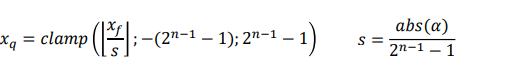

In [9]:
def symmetric_quantization(params: np.array, bits: int):
    # Calculate the scale
    alpha = np.max(np.abs(params))
    scale = alpha / (2**(bits-1)-1)
    lower_bound = -2**(bits-1)+1
    upper_bound = 2**(bits-1)-1
    # Quantize the parameters
    quantized = clamp(np.round(params / scale), lower_bound, upper_bound).astype(np.int32)
    return quantized, scale

(symmetric_q, symmetric_scale) = symmetric_quantization(params, 8)
print(f'Symmetric scale: {symmetric_scale}')
print(symmetric_q)

Symmetric scale: 1.1798425196850395
[127 -37   0  41  -6  -9   9  15  -4  47 -36  99  57  41 126  93  27   9
 126   2]


## Symmetric Dequantization
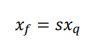

In [12]:
def symmetric_dequantize(params_q: np.array, scale: float) -> np.array:
    return params_q * scale
params_deq_symmetric = symmetric_dequantize(symmetric_q, symmetric_scale)

print(f'Dequantize Symmetric:')
print(np.round(params_deq_symmetric, 2))

Dequantize Symmetric:
[149.84 -43.65   0.    48.37  -7.08 -10.62  10.62  17.7   -4.72  55.45
 -42.47 116.8   67.25  48.37 148.66 109.73  31.86  10.62 148.66   2.36]


In [13]:
def quantization_error(params: np.array, params_q: np.array):
    # calculate the MSE
    return np.mean((params - params_q)**2)
# Calculate the quantization error
print(f'{"Asymmetric error: ":>20}{np.round(quantization_error(params, params_deq_asymmetric), 2)}')
print(f'{"Symmetric error: ":>20}{np.round(quantization_error(params, params_deq_symmetric), 2)}')

  Asymmetric error: 0.03
   Symmetric error: 0.1
